In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, auc

from sklearn.model_selection import RandomizedSearchCV

sns.set_style('darkgrid')
%matplotlib inline

## Import Data

In [2]:
data = pd.read_csv('clean-data.csv')
data

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
0,235136,2012-12-27 02:14:51,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,333588,2012-12-02 01:16:00,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,254414,2013-03-19 19:19:09,1,19,23,"Splash,Cycle,Loan",3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,51549,2013-02-26 18:50:48,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,...,0,0,0,0,1,1,0,0,0,0
49996,169179,2013-04-09 00:05:17,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49997,302367,2013-02-20 22:41:51,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,...,0,0,0,0,1,0,1,0,0,0
49998,324905,2013-04-28 12:33:04,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,...,0,0,0,0,1,1,1,0,0,0


In [3]:
# Drop Unused Feature
features = data.drop(['user', 'dayofweek', 'first_open', 'screen_list', 'enrolled_date', 'liked', 'fo_to_enrolled', 'enrolled'],axis=1)

In [4]:
features = pd.concat([features,data['enrolled']],axis=1)
features

,hour,age,numscreens,minigame,used_premium_feature,about,accountview,addproperty,addvehicle,adverseactions,...,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork,enrolled
0,2,23,15,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,24,13,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,19,23,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,28,40,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,18,31,32,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,13,32,13,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
49996,0,35,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,22,39,25,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
49998,12,27,26,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1


In [5]:
print(list(features.columns))

['hour', 'age', 'numscreens', 'minigame', 'used_premium_feature', 'about', 'accountview', 'addproperty', 'addvehicle', 'adverseactions', 'alerts', 'bankverification', 'boostfriendslist', 'bvplaidlinkcontainer', 'bvstats', 'camerascreen', 'cc1', 'cc1category', 'cc3', 'communityandinvites', 'contactinfoconfirm', 'credit1', 'credit2', 'credit3', 'credit3alerts', 'credit3container', 'credit3cta', 'credit3dashboard', 'credits', 'cycle', 'editprofile', 'employmentinfo', 'employmentsummary', 'finances', 'findfriendscycle', 'forgotpassword', 'groupedinstitutions', 'history', 'home', 'idandselfiecamerascreen', 'identityverification', 'idscreen', 'instantloanssn', 'instantoffercreateaccount', 'institutions', 'joinscreen', 'landingscreen', 'leaderboard', 'listpicker', 'llloanamount', 'loan', 'loan1', 'loan2', 'loan3', 'loan4', 'loanappagreement', 'loanappbankinfo', 'loanappconfirmwithdrawal', 'loanappdenied', 'loanappesign', 'loanapploan4', 'loanapppaymentschedule', 'loanapppromocode', 'loanappre

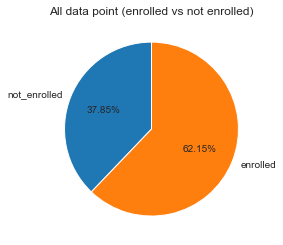

In [6]:
sizes_feat = [len(features[features['enrolled']==0]), len(features[features['enrolled']==1])]
labels = ['not_enrolled', 'enrolled']

plt.title('All data point (enrolled vs not enrolled)')
plt.pie(sizes_feat, labels=labels, autopct='%2.2f%%', startangle=90)
plt.show()

## Train Test Split

In [7]:
X = features.drop('enrolled',axis=1)
y = features['enrolled']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [9]:
y_train.value_counts()

1    21859
0    13141
Name: enrolled, dtype: int64

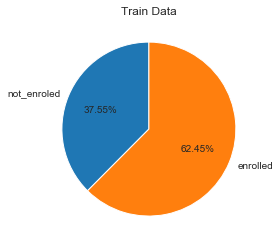

In [10]:
sizes = [len(y_train[y_train==0]), len(y_train[y_train==1])]
labels = ['not_enroled', 'enrolled']


plt.title('Train Data')
plt.pie(sizes, labels=labels, autopct='%2.2f%%', startangle=90)

plt.show()

## Modelling

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Gradient Boosting Clasifier

### Logistic Regression

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
pred_logreg = logreg.predict(X_test)
proba_logreg = logreg.predict_proba(X_test)

In [13]:
print(confusion_matrix(y_test, pred_logreg))

[[5084  701]
 [1624 7591]]


In [14]:
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      5785
           1       0.92      0.82      0.87      9215

    accuracy                           0.84     15000
   macro avg       0.84      0.85      0.84     15000
weighted avg       0.85      0.84      0.85     15000



In [15]:
cr_logreg = classification_report(y_test,pred_logreg,output_dict=True)
cr_logreg = pd.DataFrame(cr_logreg).T
cr_logreg

,precision,recall,f1-score,support
0,0.757901,0.878825,0.813896,5785.000
1,0.915461,0.823766,0.867196,9215.000
accuracy,0.845000,0.845000,0.845000,0.845
macro avg,0.836681,0.851295,0.840546,15000.000
weighted avg,0.854695,0.845000,0.846640,15000.000


### Decision Tree Classifier

In [16]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
pred_dt = dtree.predict(X_test)
proba_dt = dtree.predict_proba(X_test)

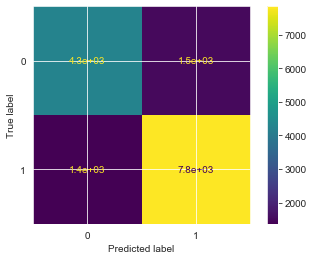

In [18]:
print(plot_confusion_matrix(dtree, X_test, y_test))

In [19]:
print(confusion_matrix(y_test, pred_dt))

[[4254 1531]
 [1367 7848]]


In [20]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5785
           1       0.84      0.85      0.84      9215

    accuracy                           0.81     15000
   macro avg       0.80      0.79      0.80     15000
weighted avg       0.81      0.81      0.81     15000



In [21]:
cr_dt = classification_report(y_test,pred_dt,output_dict=True)
cr_dt = pd.DataFrame(cr_dt).T
cr_dt

,precision,recall,f1-score,support
0,0.756805,0.735350,0.745923,5785.0000
1,0.836763,0.851655,0.844143,9215.0000
accuracy,0.806800,0.806800,0.806800,0.8068
macro avg,0.796784,0.793502,0.795033,15000.0000
weighted avg,0.805926,0.806800,0.806263,15000.0000


### Random Forest Classifier

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
pred_rfc = rfc.predict(X_test)
proba_rfc = rfc.predict_proba(X_test)

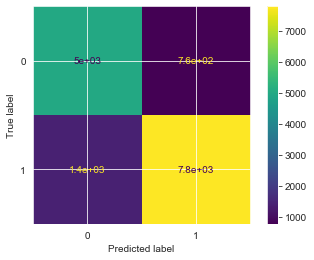

In [24]:
print(plot_confusion_matrix(rfc, X_test, y_test))

In [25]:
print(confusion_matrix(y_test, pred_rfc))

[[5020  765]
 [1418 7797]]


In [26]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      5785
           1       0.91      0.85      0.88      9215

    accuracy                           0.85     15000
   macro avg       0.85      0.86      0.85     15000
weighted avg       0.86      0.85      0.86     15000



In [27]:
cr_rfc = classification_report(y_test,pred_rfc,output_dict=True)
cr_rfc = pd.DataFrame(cr_rfc).T
cr_rfc

,precision,recall,f1-score,support
0,0.779745,0.867761,0.821402,5785.000000
1,0.910652,0.846120,0.877201,9215.000000
accuracy,0.854467,0.854467,0.854467,0.854467
macro avg,0.845198,0.856941,0.849302,15000.000000
weighted avg,0.860165,0.854467,0.855681,15000.000000


### Gradient Boosting Classifier

In [28]:
gradient = GradientBoostingClassifier()
gradient.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
pred_gradient = gradient.predict(X_test)
proba_gradient = gradient.predict_proba(X_test)

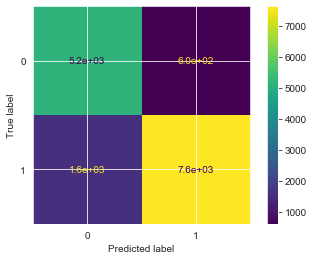

In [30]:
print(plot_confusion_matrix(gradient, X_test, y_test))

In [31]:
print(confusion_matrix(y_test, pred_gradient))

[[5180  605]
 [1583 7632]]


In [32]:
print(classification_report(y_test, pred_gradient))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      5785
           1       0.93      0.83      0.87      9215

    accuracy                           0.85     15000
   macro avg       0.85      0.86      0.85     15000
weighted avg       0.86      0.85      0.86     15000



In [33]:
cr_grad = classification_report(y_test,pred_gradient,output_dict=True)
cr_grad = pd.DataFrame(cr_grad).T
cr_grad

,precision,recall,f1-score,support
0,0.765932,0.895419,0.825630,5785.000000
1,0.926551,0.828215,0.874628,9215.000000
accuracy,0.854133,0.854133,0.854133,0.854133
macro avg,0.846242,0.861817,0.850129,15000.000000
weighted avg,0.864606,0.854133,0.855731,15000.000000


### ROC AUC

In [34]:
prob_logreg = proba_logreg[:,1]
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

prob_dt = proba_dt[:,1]
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

prob_rfc = proba_rfc[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, prob_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

prob_gradient = proba_gradient[:,1]
fpr_gradient, tpr_gradient, threshold_gradient = roc_curve(y_test, prob_gradient)
roc_auc_gradient = auc(fpr_gradient, tpr_gradient)

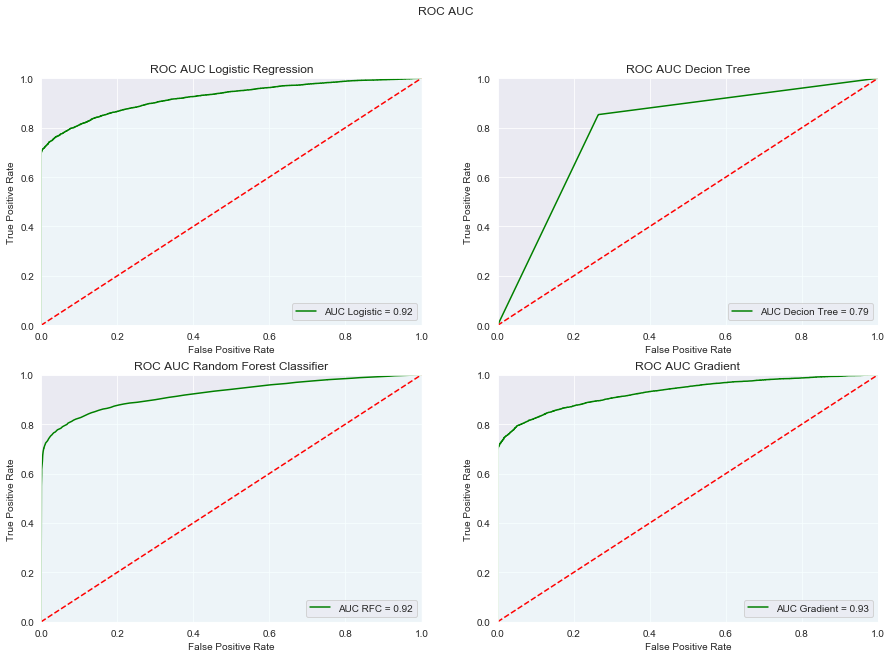

In [35]:
plt.figure(figsize=(15,10))
plt.suptitle('ROC AUC')

plt.subplot(221)
plt.title('ROC AUC Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'green', label='AUC Logistic = {}'.format(round(roc_auc_logreg,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg,tpr_logreg, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(222)
plt.title('ROC AUC Decion Tree')
plt.plot(fpr_dt, tpr_dt, 'green', label='AUC Decion Tree = {}'.format(round(roc_auc_dt,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dt,tpr_dt, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(223)
plt.title('ROC AUC Random Forest Classifier')
plt.plot(fpr_rfc, tpr_rfc, 'green', label='AUC RFC = {}'.format(round(roc_auc_rfc,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc,tpr_rfc, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(224)
plt.title('ROC AUC Gradient')
plt.plot(fpr_gradient, tpr_gradient, 'green', label='AUC Gradient = {}'.format(round(roc_auc_gradient,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gradient,tpr_gradient, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.show()

## Metric Evaluation Summary
Tujuan Model Machine Learning ini adalah untuk mengetahui user / customer mana yang akan berlangganan untuk menggunakan fitur Premium pada sebuah aplikasi. User/Customer yang diprediksi tidak subscribe bisa ditarget untuk campaign marketing selanjutnya, misal pemeberian discount,dll.

Berdasarkan objecive di atas, untuk evaluation metrics berfokus pada angka False Positive(actualnya tdk subscribe, tetapi diprediksi subscribe) yang kecil. Jika angka FP besar, maka kita akan kehilangan banyak user/customer potensial sebagai target promo kita. Oleh karena itu penentuan model, akan berfokus pada Precision(+) & Recall (-), accuracy, serta ROC AUC

In [36]:
prec_logreg = round(cr_logreg.iloc[1,0]*100,2)
rec_logreg = round(cr_logreg.iloc[0,1]*100,2)
acc_logerg = round(cr_logreg.iloc[2,0]*100,2)
auc_logreg = round(auc(fpr_logreg, tpr_logreg)*100,2)

prec_dt = round(cr_dt.iloc[1,0]*100,2)
rec_dt = round(cr_dt.iloc[0,1]*100,2)
acc_dt = round(cr_dt.iloc[2,0]*100,2)
auc_dt = round(auc(fpr_dt, tpr_dt)*100,2)

prec_rfc = round(cr_rfc.iloc[1,0]*100,2)
rec_rfc = round(cr_rfc.iloc[0,1]*100,2)
acc_rfc = round(cr_rfc.iloc[2,0]*100,2)
auc_rfc = round(auc(fpr_rfc, tpr_rfc)*100,2)

prec_grad = round(cr_grad.iloc[1,0]*100,2)
rec_grad = round(cr_grad.iloc[0,1]*100,2)
acc_grad = round(cr_grad.iloc[2,0]*100,2)
auc_grad = round(auc(fpr_gradient, tpr_gradient)*100,2)

all_prec = [prec_logreg, prec_dt, prec_rfc, prec_grad]
all_rec = [rec_logreg,rec_dt,rec_rfc,rec_grad]
all_acc = [acc_logerg, acc_dt, acc_rfc, acc_grad]
all_auc = [auc_logreg, auc_dt, auc_rfc, auc_grad]

In [37]:
df_mtrc = pd.DataFrame([all_prec,all_rec,all_acc, all_auc], columns=['logreg', 'dtree', 'rfc', 'gradboost'],
                       index=['precision(+)', 'recall(-)', 'accuracy', 'auc'])
df_mtrc = df_mtrc.T
df_mtrc

,precision(+),recall(-),accuracy,auc
logreg,91.55,87.88,84.50,92.36
dtree,83.68,73.54,80.68,79.40
rfc,91.07,86.78,85.45,92.34
gradboost,92.66,89.54,85.41,92.90


## Hyperparameter Tuning
1. Logistic Regression
2. Random Forest Classifier
3. Gradient Boosting Classifier

### Logistic Regression

In [38]:
logreg_cv = LogisticRegression()

In [39]:
param_logreg_cv = {
    'C': [0.1, 0.5, 0.9, 1, 2, 5],
    'penalty':['l1','l2', 'elsaticnet'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
} 

logreg_cv_random = RandomizedSearchCV(estimator= logreg_cv,
                              param_distributions= param_logreg_cv,
                              n_iter=10, cv=5, n_jobs=-1)

In [40]:
logreg_cv_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                                        'penalty': ['l1', 'l2', 'elsaticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinea

In [41]:
logreg_cv_random.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 2}

In [42]:
logreg_cv_rand = logreg_cv_random.best_estimator_
logreg_cv_rand

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
pred_logreg_cv = logreg_cv_rand.predict(X_test)
proba_logreg_cv = logreg_cv_rand.predict_proba(X_test)

In [44]:
print(confusion_matrix(y_test, pred_logreg_cv))

[[5103  682]
 [1577 7638]]


In [45]:
print(classification_report(y_test, pred_logreg_cv))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      5785
           1       0.92      0.83      0.87      9215

    accuracy                           0.85     15000
   macro avg       0.84      0.86      0.84     15000
weighted avg       0.86      0.85      0.85     15000



In [46]:
cr_logreg_rand = classification_report(y_test,pred_logreg_cv,output_dict=True)
cr_logreg_rand = pd.DataFrame(cr_logreg_rand).T
cr_logreg_rand

,precision,recall,f1-score,support
0,0.763922,0.882109,0.818773,5785.0000
1,0.918029,0.828866,0.871172,9215.0000
accuracy,0.849400,0.849400,0.849400,0.8494
macro avg,0.840976,0.855487,0.844972,15000.0000
weighted avg,0.858595,0.849400,0.850963,15000.0000


### Random Forest Classifier

In [47]:
rfc_cv = RandomForestClassifier()

In [48]:
param_rfc_cv = {
    'bootstrap': [True, False],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [int(x) for x in np.arange(10,120,20)],
    'min_samples_split' : [int(x) for x in np.arange(2,12,2)],
    'n_estimators' : [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
}

rfc_cv_random = RandomizedSearchCV(estimator= rfc_cv,
                              param_distributions= param_rfc_cv,
                              n_iter=10, cv=5, n_jobs=-1)

In [49]:
rfc_cv_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [50]:
rfc_cv_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'max_depth': 110,
 'criterion': 'entropy',
 'bootstrap': True}

In [51]:
rfc_cv_rand = rfc_cv_random.best_estimator_
rfc_cv_rand

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=110, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
pred_rfc_cv = rfc_cv_rand.predict(X_test)
proba_rfc_cv = rfc_cv_rand.predict_proba(X_test)

In [53]:
print(confusion_matrix(y_test, pred_rfc_cv))

[[5110  675]
 [1419 7796]]


In [54]:
print(classification_report(y_test, pred_rfc_cv))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      5785
           1       0.92      0.85      0.88      9215

    accuracy                           0.86     15000
   macro avg       0.85      0.86      0.86     15000
weighted avg       0.87      0.86      0.86     15000



In [55]:
cr_rfc_rand = classification_report(y_test,pred_rfc_cv,output_dict=True)
cr_rfc_rand = pd.DataFrame(cr_rfc_rand).T
cr_rfc_rand

,precision,recall,f1-score,support
0,0.782662,0.883319,0.829950,5785.0000
1,0.920316,0.846012,0.881601,9215.0000
accuracy,0.860400,0.860400,0.860400,0.8604
macro avg,0.851489,0.864665,0.855775,15000.0000
weighted avg,0.867228,0.860400,0.861681,15000.0000


### Gradient Boosting Classifier

In [56]:
gradient_cv = GradientBoostingClassifier()

In [57]:
param_gradient_cv = {
    'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
    'max_depth' : [int(x) for x in np.arange(10,120,20)],
    'min_samples_split' : [int(x) for x in np.arange(2,12,2)]    
}

gradient_cv_random = RandomizedSearchCV(estimator= gradient_cv,
                              param_distributions= param_gradient_cv,
                              n_iter=10, cv=5, n_jobs=-1)

In [58]:
gradient_cv_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [59]:
gradient_cv_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'max_depth': 50,
 'learning_rate': 0.25}

In [60]:
gradient_cv_rand = gradient_cv_random.best_estimator_
gradient_cv_rand

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=50,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [61]:
pred_gradient_cv = gradient_cv_rand.predict(X_test)
proba_gradient_cv = gradient_cv_rand.predict_proba(X_test)

In [62]:
print(confusion_matrix(y_test, pred_gradient_cv))

[[4849  936]
 [1402 7813]]


In [63]:
print(classification_report(y_test, pred_gradient_cv))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      5785
           1       0.89      0.85      0.87      9215

    accuracy                           0.84     15000
   macro avg       0.83      0.84      0.84     15000
weighted avg       0.85      0.84      0.85     15000



In [64]:
cr_grad_rand = classification_report(y_test,pred_gradient_cv,output_dict=True)
cr_grad_rand = pd.DataFrame(cr_grad_rand).T
cr_grad_rand

,precision,recall,f1-score,support
0,0.775716,0.838202,0.805749,5785.000000
1,0.893016,0.847857,0.869851,9215.000000
accuracy,0.844133,0.844133,0.844133,0.844133
macro avg,0.834366,0.843030,0.837800,15000.000000
weighted avg,0.847777,0.844133,0.845129,15000.000000


## ROC AUC for Model Tuning

In [65]:
prob_logreg_cv = proba_logreg_cv[:,1]
fpr_logreg_cv, tpr_logreg_cv, threshold_logreg_cv = roc_curve(y_test, prob_logreg_cv)
roc_auc_logreg_cv = auc(fpr_logreg_cv, tpr_logreg_cv)

prob_rfc_cv = proba_rfc_cv[:,1]
fpr_rfc_cv, tpr_rfc_cv, threshold_rfc_cv = roc_curve(y_test, prob_rfc_cv)
roc_auc_rfc_cv = auc(fpr_rfc, tpr_rfc)

prob_gradient_cv = proba_gradient_cv[:,1]
fpr_gradient_cv, tpr_gradient_cv, threshold_gradient_cv = roc_curve(y_test, prob_gradient_cv)
roc_auc_gradient_cv = auc(fpr_gradient_cv, tpr_gradient_cv)

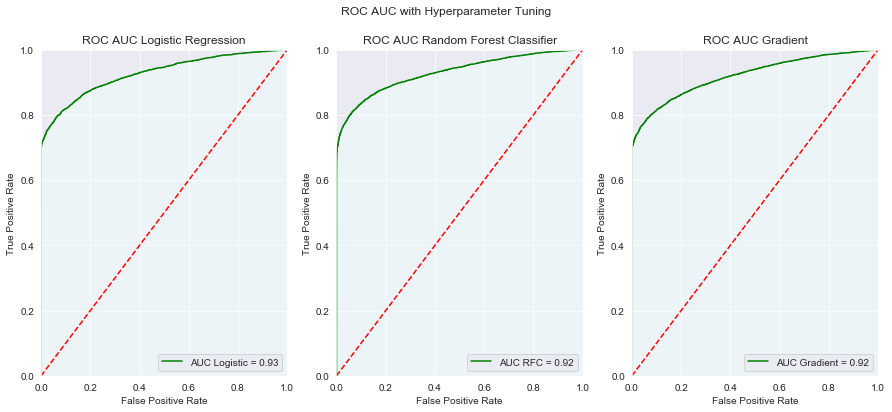

In [66]:
plt.figure(figsize=(15,6))
plt.suptitle('ROC AUC with Hyperparameter Tuning')

plt.subplot(131)
plt.title('ROC AUC Logistic Regression')
plt.plot(fpr_logreg_cv, tpr_logreg_cv, 'green', label='AUC Logistic = {}'.format(round(roc_auc_logreg_cv,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg_cv,tpr_logreg_cv, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(132)
plt.title('ROC AUC Random Forest Classifier')
plt.plot(fpr_rfc_cv, tpr_rfc_cv, 'green', label='AUC RFC = {}'.format(round(roc_auc_rfc_cv,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc_cv,tpr_rfc_cv, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(133)
plt.title('ROC AUC Gradient')
plt.plot(fpr_gradient_cv, tpr_gradient_cv, 'green', label='AUC Gradient = {}'.format(round(roc_auc_gradient_cv,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gradient_cv,tpr_gradient_cv, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.show()

## Metric Evaluation for Model Tuning

In [67]:
prec_logreg_rand = round(cr_logreg_rand.iloc[1,0]*100,2)
rec_logreg_rand = round(cr_logreg_rand.iloc[0,1]*100,2)
acc_logerg_rand = round(cr_logreg_rand.iloc[2,0]*100,2)
auc_logreg_rand = round(auc(fpr_logreg_cv, tpr_logreg_cv)*100,2)

prec_rfc_rand = round(cr_rfc_rand.iloc[1,0]*100,2)
rec_rfc_rand = round(cr_rfc_rand.iloc[0,1]*100,2)
acc_rfc_rand = round(cr_rfc_rand.iloc[2,0]*100,2)
auc_rfc_rand = round(auc(fpr_rfc_cv, tpr_rfc_cv)*100,2)

prec_grad_rand = round(cr_grad_rand.iloc[1,0]*100,2)
rec_grad_rand = round(cr_grad_rand.iloc[0,1]*100,2)
acc_grad_rand = round(cr_grad_rand.iloc[2,0]*100,2)
auc_grad_rand = round(auc(fpr_gradient_cv, tpr_gradient_cv)*100,2)

all_prec_rand = [prec_logreg_rand, prec_rfc_rand, prec_grad_rand]
all_rec_rand = [rec_logreg_rand, rec_rfc_rand, rec_grad_rand]
all_acc_rand = [acc_logerg_rand, acc_rfc_rand, acc_grad_rand]
all_auc_rand = [auc_logreg_rand, auc_rfc_rand, auc_grad_rand]

In [68]:
df_mtrc_rand = pd.DataFrame([all_prec_rand, all_rec_rand, all_acc_rand, all_auc_rand], 
                            columns=['logreg_rand', 'rfc_rand', 'gradboost_rand'],
                       index=['precision(+)', 'recall(-)', 'accuracy', 'auc'])
df_mtrc_rand = df_mtrc_rand.T
df_mtrc_rand

,precision(+),recall(-),accuracy,auc
logreg_rand,91.80,88.21,84.94,92.66
rfc_rand,92.03,88.33,86.04,92.94
gradboost_rand,89.30,83.82,84.41,92.06


## Comaparing Models Metric Evaluation

In [69]:
#concat metric eval
all_metric = pd.concat([df_mtrc, df_mtrc_rand], axis=0)
all_metric.sort_values(['precision(+)', 'recall(-)', 'accuracy', 'auc'], ascending=False)

,precision(+),recall(-),accuracy,auc
gradboost,92.66,89.54,85.41,92.90
rfc_rand,92.03,88.33,86.04,92.94
logreg_rand,91.80,88.21,84.94,92.66
logreg,91.55,87.88,84.50,92.36
rfc,91.07,86.78,85.45,92.34
gradboost_rand,89.30,83.82,84.41,92.06
dtree,83.68,73.54,80.68,79.40


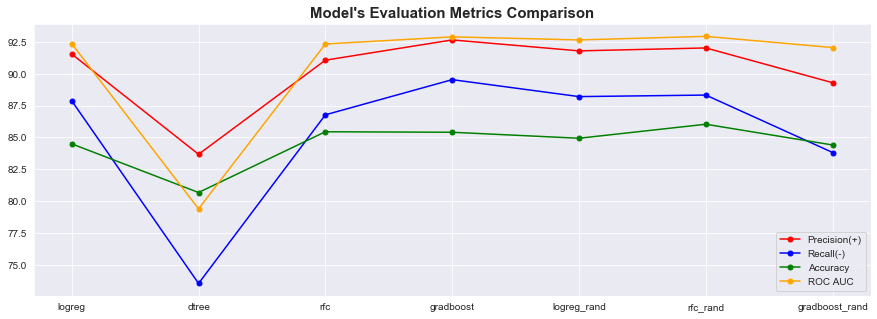

In [70]:
plt.figure(figsize=(15,5))
plt.title("Model's Evaluation Metrics Comparison", size=15, fontweight='bold')

plt.plot(all_metric.index, all_metric['precision(+)'], label = 'Precision(+)', color='red', marker='o', markersize=5)
plt.plot(all_metric.index, all_metric['recall(-)'], label = 'Recall(-)', color='blue', marker='o', markersize=5)
plt.plot(all_metric.index, all_metric['accuracy'], label = 'Accuracy', color='green', marker='o', markersize=5)
plt.plot(all_metric.index, all_metric['auc'], label = 'ROC AUC', color='orange', marker='o', markersize=5)
plt.legend(loc='lower right')
plt.show()

## Best Model
#### Gradient Boosting Classifier (without tuning)

## Deploy Model

In [71]:
import joblib

In [72]:
joblib.dump(gradient, 'gradient_model_final')

['gradient_model_final']